In [2]:
# Improt Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [16]:
df = pd.read_csv("../data/loan_data.csv")
df.head()
info = df.info()
min_values = df.min()
max_values = df.max()
summary = pd.DataFrame({'min':min_values,'max':max_values})

summary.head(13)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      45000 non-null  float64
 1   person_gender                   45000 non-null  object 
 2   person_education                45000 non-null  object 
 3   person_income                   45000 non-null  float64
 4   person_emp_exp                  45000 non-null  int64  
 5   person_home_ownership           45000 non-null  object 
 6   loan_amnt                       45000 non-null  float64
 7   loan_intent                     45000 non-null  object 
 8   loan_int_rate                   45000 non-null  float64
 9   loan_percent_income             45000 non-null  float64
 10  cb_person_cred_hist_length      45000 non-null  float64
 11  credit_score                    45000 non-null  int64  
 12  previous_loan_defaults_on_file  

,min,max
person_age,20.0,144.0
person_gender,female,male
person_education,Associate,Master
person_income,8000.0,7200766.0
person_emp_exp,0,125
person_home_ownership,MORTGAGE,RENT
loan_amnt,500.0,35000.0
loan_intent,DEBTCONSOLIDATION,VENTURE
loan_int_rate,5.42,20.0
loan_percent_income,0.0,0.66


Max person_age is 144.
Is this trustable?
How many sample have unreliable data?

In [19]:
print((df['person_age']>=100).sum())
df[df['person_age']>=100]

7


,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
81,144.0,male,Bachelor,300616.0,125,RENT,4800.0,VENTURE,13.57,0.02,3.0,789,No,0
183,144.0,male,Associate,241424.0,121,MORTGAGE,6000.0,EDUCATION,11.86,0.02,2.0,807,No,0
575,123.0,female,High School,97140.0,101,RENT,20400.0,EDUCATION,10.25,0.21,3.0,805,Yes,0
747,123.0,male,Bachelor,94723.0,100,RENT,20000.0,VENTURE,11.01,0.21,4.0,714,Yes,0
32297,144.0,female,Associate,7200766.0,124,MORTGAGE,5000.0,PERSONAL,12.73,0.00,25.0,850,No,0
37930,116.0,male,Bachelor,5545545.0,93,MORTGAGE,3823.0,VENTURE,12.15,0.00,24.0,708,No,0
38113,109.0,male,High School,5556399.0,85,MORTGAGE,6195.0,VENTURE,12.58,0.00,22.0,792,No,0


In [6]:
df.isnull().sum()

person_age                        0
person_gender                     0
person_education                  0
person_income                     0
person_emp_exp                    0
person_home_ownership             0
loan_amnt                         0
loan_intent                       0
loan_int_rate                     0
loan_percent_income               0
cb_person_cred_hist_length        0
credit_score                      0
previous_loan_defaults_on_file    0
loan_status                       0
dtype: int64

In [8]:
df.duplicated().sum()

np.int64(0)

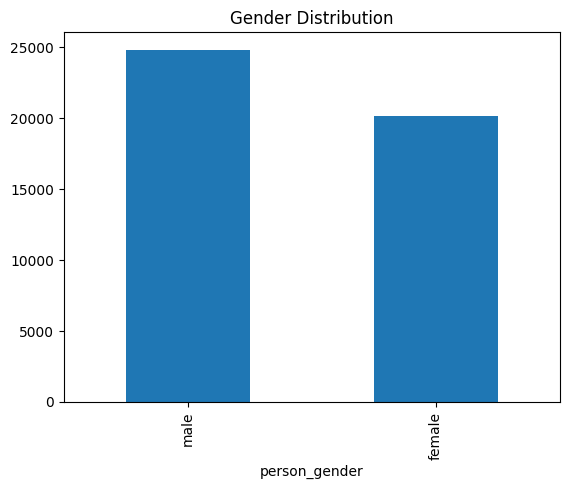

In [10]:
df['person_gender'].value_counts().plot(kind='bar')
plt.title("Gender Distribution")
plt.show()

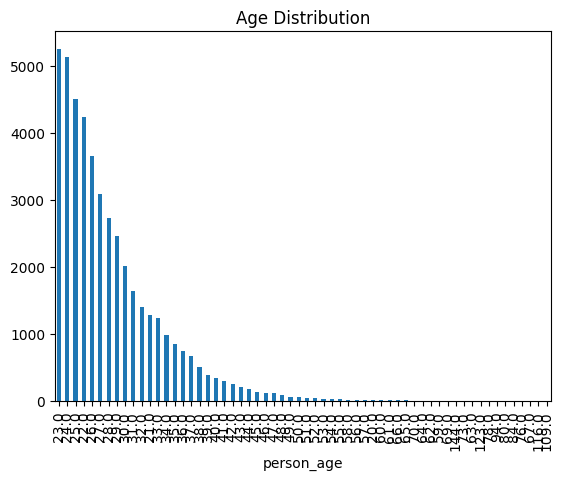

In [11]:
df['person_age'].value_counts().plot(kind='bar')
plt.title("Age Distribution")
plt.show()

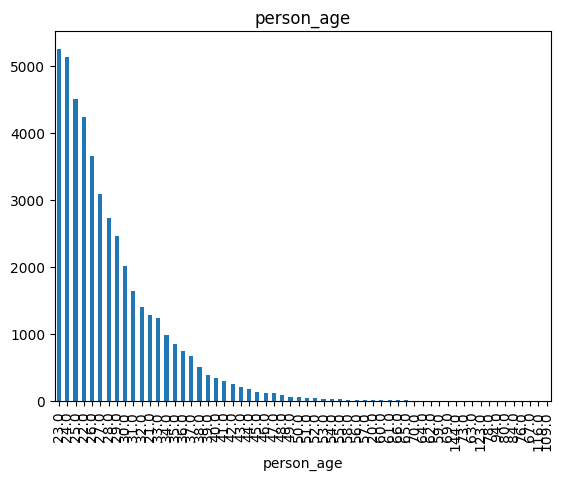

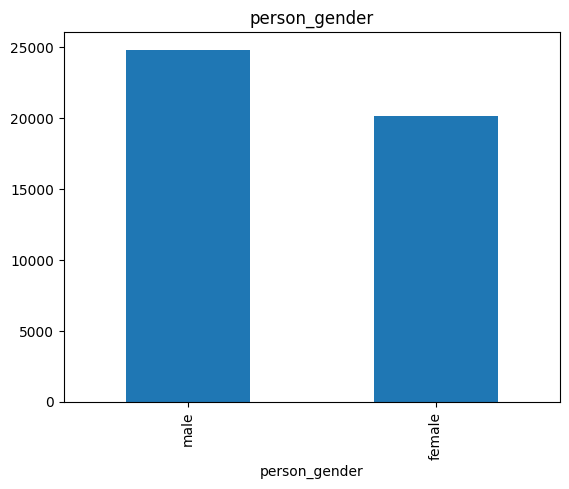

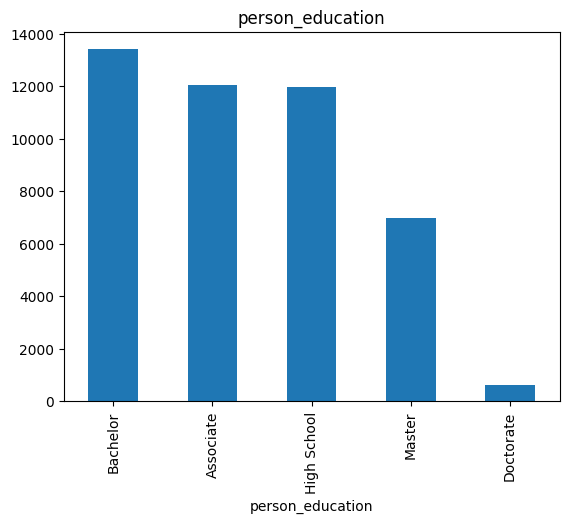

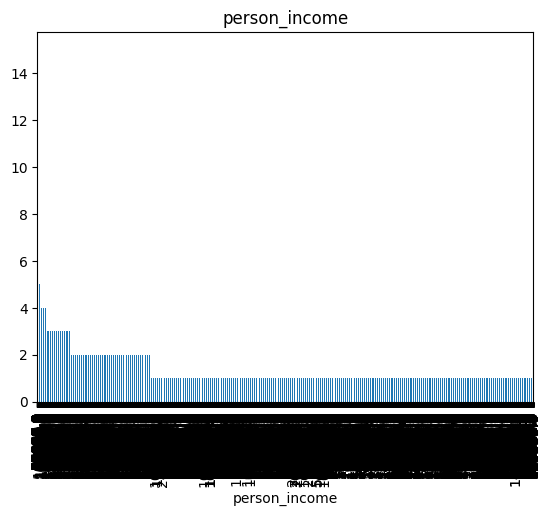

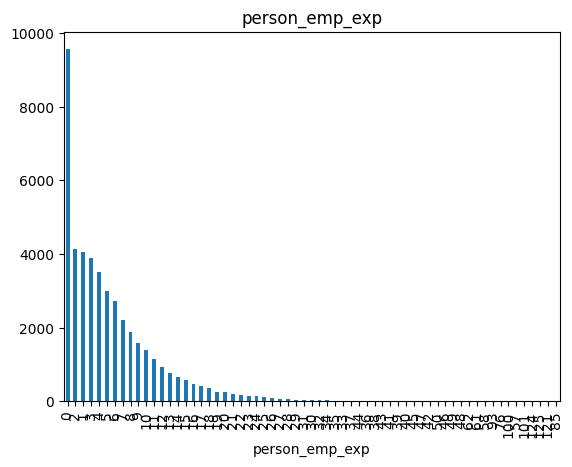

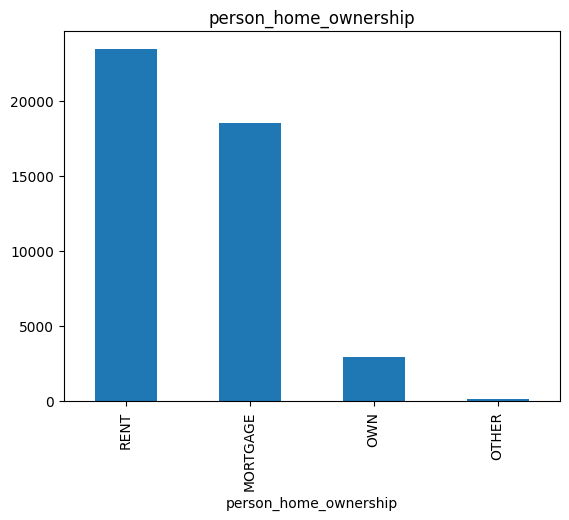

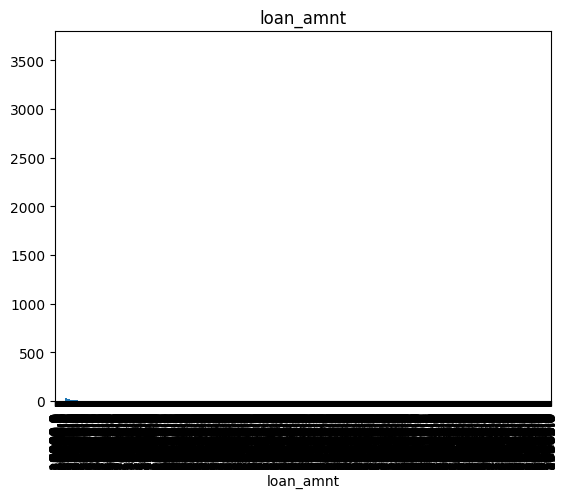

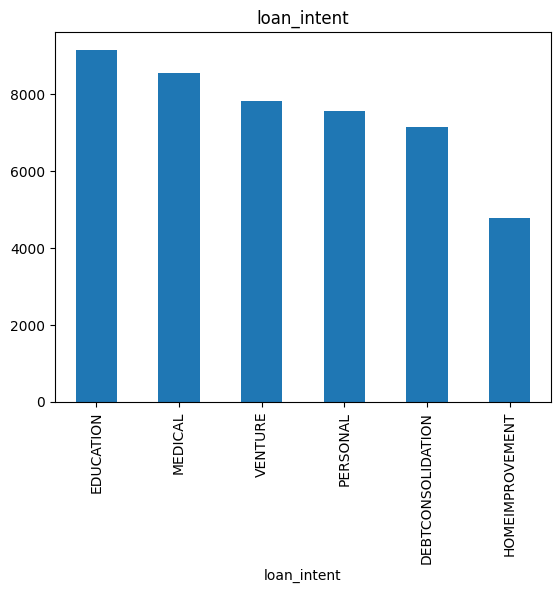

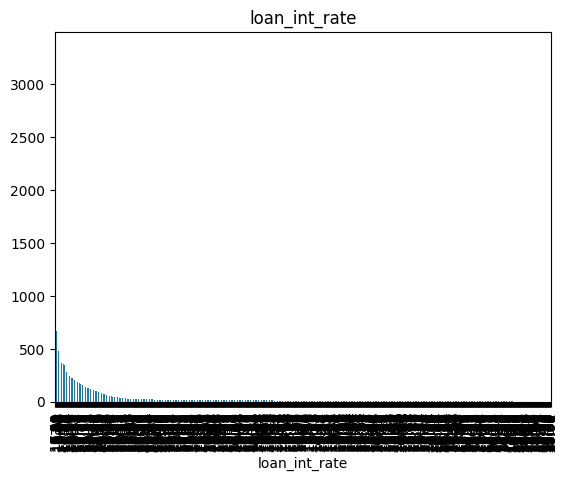

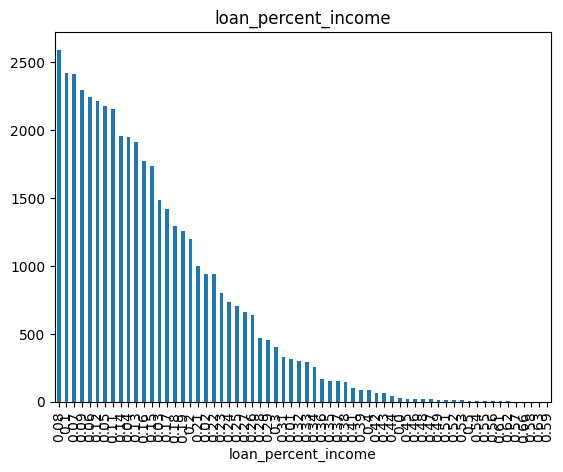

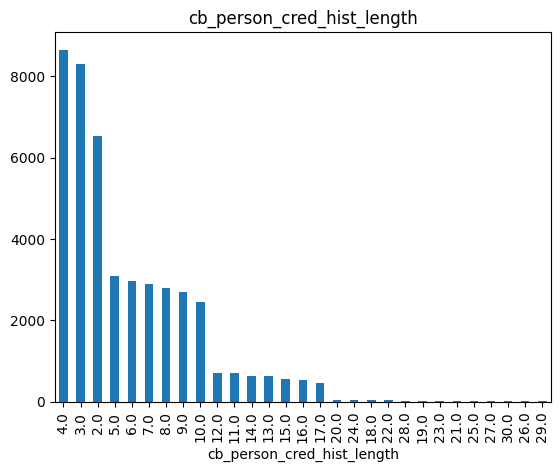

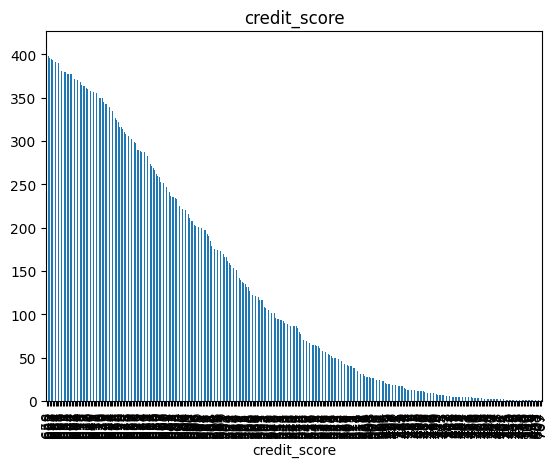

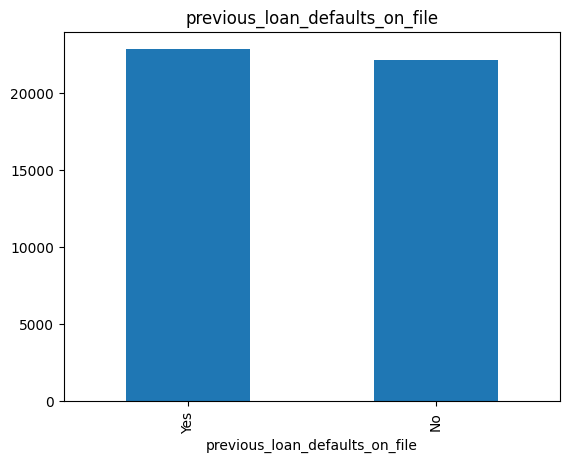

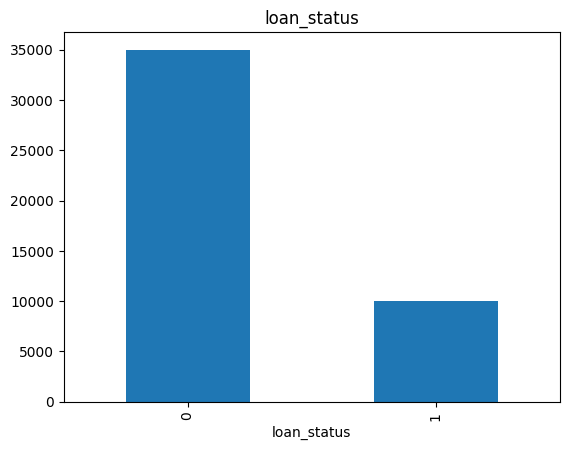

In [ ]:
for column in df.columns:
    df[column].value_counts().plot(kind='bar')
    plt.title(column)
    plt.show()



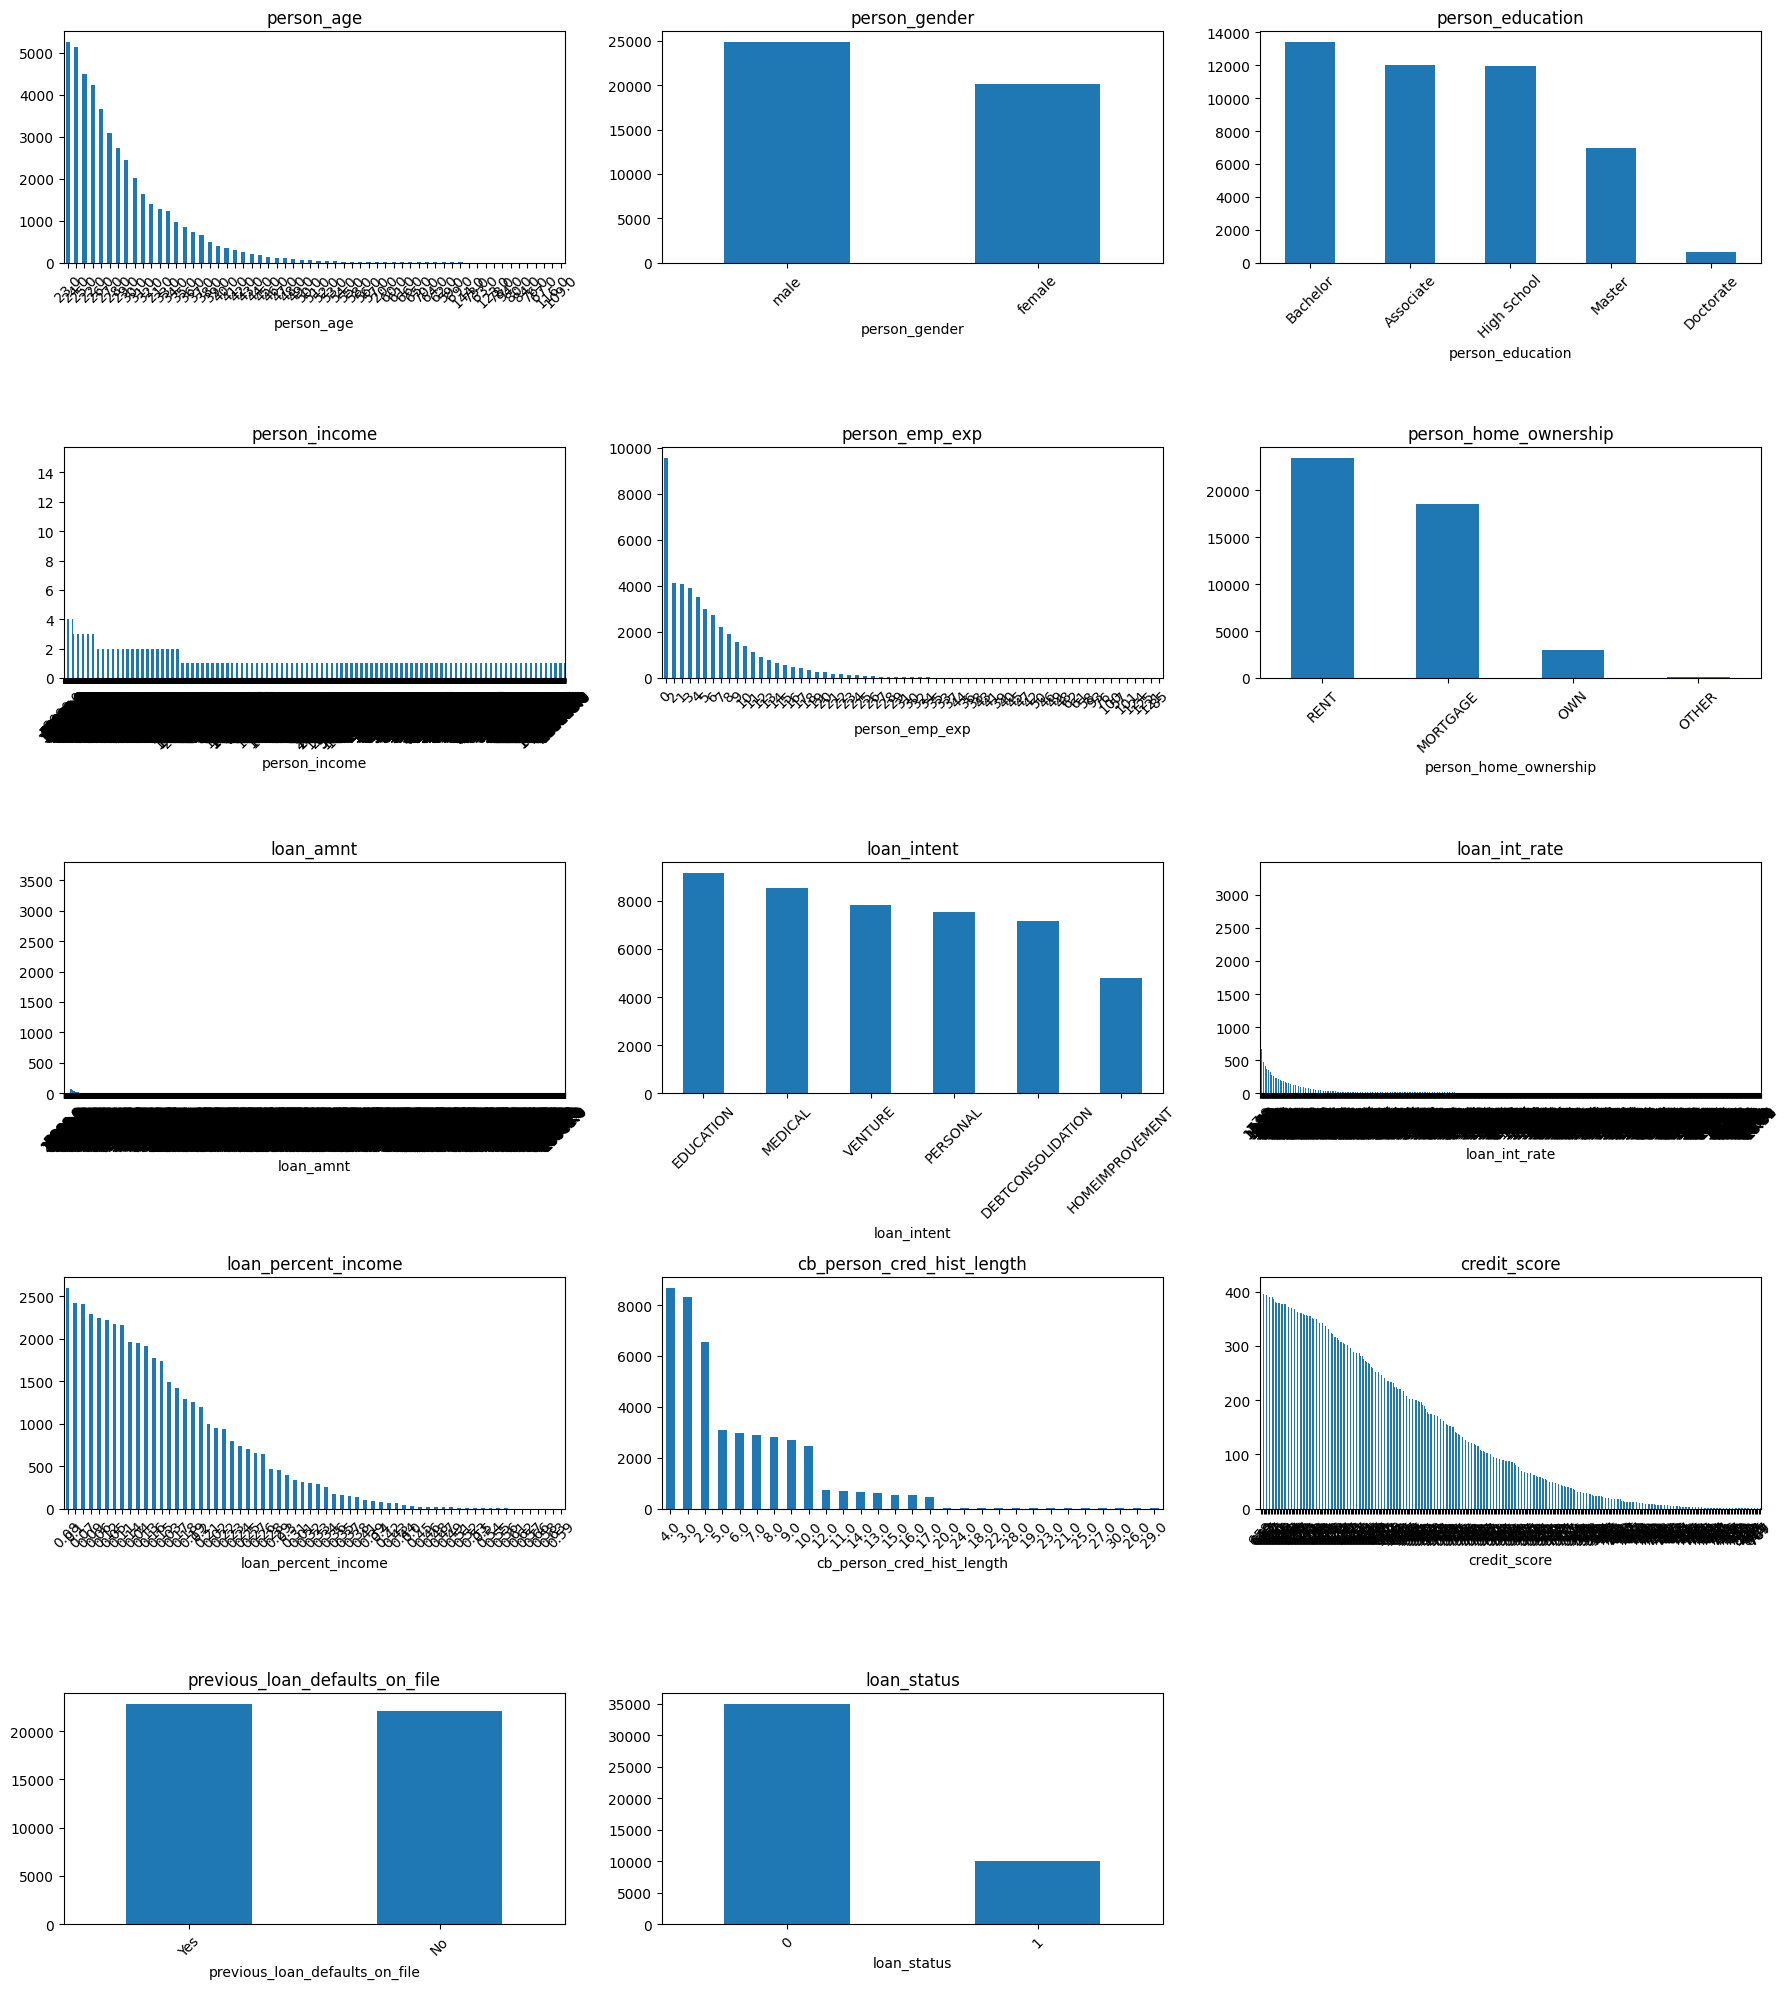

In [ ]:
'''
# 서브플롯 행/열 수 정하기 (예: 3열씩)
n_rows = (n_cols + 2) // 3  # 3열 기준으로 필요한 행 수 계산

# 서브플롯 생성
fig, axes = plt.subplots(n_rows, 3, figsize=(18, n_rows * 4))
axes = axes.flatten()  # 인덱싱 쉽게 1D 배열로 변환
'''

fig, axes = plt.subplots(5, 3, figsize=(18, 5 * 4))
axes = axes.flatten()

for i, column in enumerate(df.columns):
    df[column].value_counts().plot(kind='bar', ax=axes[i])
    axes[i].set_title(column)
    axes[i].tick_params(axis='x', rotation=45)

for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [20]:
df[['person_age', 'loan_status']].corr()

,person_age,loan_status
person_age,1.000000,-0.021476
loan_status,-0.021476,1.000000


In [ ]:
numerical_features_idx = df.columns.get_indexer(df.select_dtypes(include=['int64', 'float64']).columns)
numerical_features = df.columns[numerical_features_idx]

fig, ax = plt.subplots(1,len(numerical_features_idx))
for i, numerical_feature in enumerate(numerical_features):
    df[numerical_feature].plot(kind = 'box', ax = ax[i], figsize = (60,5)).set_title(numerical_feature)